In [49]:
import pandas as pd
import numpy as np
from datetime import *
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams
fontsize = 16

In [50]:
tabelao = pd.read_csv("TABELAO_FINAL.csv")
tabelao.DATA_NASCIMENTO = pd.to_datetime(tabelao.DATA_NASCIMENTO)

In [51]:
# idade = tabelao['DATA_NASCIMENTO'].apply(lambda x: (datetime.now().year - x.year))
# tabelao.insert(loc=2, column='IDADE', value=idade.fillna(0).astype(int))
# tabelao.to_csv('TABELAO_FINAL.csv',index=False)

In [52]:
tabelao.head(20)

,CODIGO_CLIENTE,DATA_NASCIMENTO,IDADE,SEXO,ESTADO_CIVIL,CIDADE,UF,BAIRRO,CEP,QTD_DEPENDENTES,...,CATEGORIAL_PROFISSAO,TIPO_RESIDENCIA,RENDA_TITULAR,RENDA_CJ,OUTRAS_RENDAS,QTD_CARTOES_ADICIONAIS,FLAG_CONTA_BANCO,VALOR_HISTORICO_COMPRAS,DATA_LIMITE,CLASS
0,875,1974-03-03,46,F,SO,SANTO CRISTO,RS,PHILIPPSEN,98960000.0,0.0,...,AUT+NOMO,PR,1000.00,NaN,NaN,0,NaN,1225.73,2018-04-30,0
1,1689,1978-02-20,42,M,SO,TOLEDO,PR,JARDIM COOPAGRO,85903370.0,0.0,...,APOSENTADO,AL,1152.00,NaN,NaN,0,NaN,1045.04,2018-05-30,1
2,5140,1956-10-16,64,M,SO,SANTA ROSA,RS,CRUZEIRO,98900000.0,0.0,...,APOSENTADO,PR,1900.00,NaN,NaN,0,NaN,3280.56,2017-09-13,0
3,7376,1961-01-22,59,M,SE,SANTA ROSA,RS,AUXILIADORA,98796524.0,0.0,...,ASSALARIADO,PR,2182.00,NaN,NaN,0,S,1337.71,2018-05-14,0
4,9042,1968-08-22,52,F,CA,SANTA ROSA,RS,CENTRAL,98787404.0,0.0,...,ASSALARIADO,PR,3335.00,1800,NaN,0,NaN,5987.88,2017-08-20,1
5,9659,1959-11-30,61,M,CA,SANTA ROSA,RS,CENTRO,98900000.0,0.0,...,APOSENTADO,PR,2242.00,1000,1000,0,S,1345.55,2017-09-07,0
6,9945,1963-08-01,57,F,SE,SANTA ROSA,RS,TIMBAUVA,98781052.0,2.0,...,ASSALARIADO,PR,5900.00,NaN,NaN,0,NaN,5929.81,2018-04-11,0
7,10161,1960-06-07,60,M,CA,SANTA ROSA,RS,CENTRAL,98787518.0,0.0,...,APOSENTADO,PR,1100.00,NaN,NaN,0,NaN,6724.50,2017-08-01,0
8,10992,1978-02-09,42,M,CA,SANTA ROSA,RS,CRUZEIRO,98900000.0,0.0,...,AUT+NOMO,PR,3600.00,0,NaN,0,NaN,2570.25,2017-11-22,1
9,12400,1949-05-14,71,M,SE,SANTA ROSA,RS,CENTRAL,98787396.0,0.0,...,APOSENTADO,PR,2400.00,NaN,1,0,NaN,4664.40,2017-07-24,1


In [53]:
tabelao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102419 entries, 0 to 102418
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CODIGO_CLIENTE           102419 non-null  int64         
 1   DATA_NASCIMENTO          102415 non-null  datetime64[ns]
 2   IDADE                    102419 non-null  int64         
 3   SEXO                     102418 non-null  object        
 4   ESTADO_CIVIL             102418 non-null  object        
 5   CIDADE                   102419 non-null  object        
 6   UF                       102419 non-null  object        
 7   BAIRRO                   102419 non-null  object        
 8   CEP                      102419 non-null  float64       
 9   QTD_DEPENDENTES          102417 non-null  float64       
 10  DATA_CADASTRO            102419 non-null  object        
 11  DATA_ADMISSAO            55297 non-null   object        
 12  CATEGORIAL_PROFI

In [54]:
good = tabelao[tabelao.CLASS == 0]
bad = tabelao[tabelao.CLASS == 1]

# Classificação

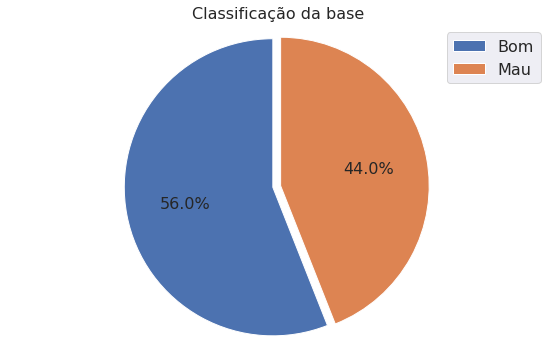

In [63]:
# Data to plot
import matplotlib as mpl
mpl.rcParams['font.size'] = fontsize

labels = ['Bom', 'Mau']
sizes = [len(good), len(bad)]
explode = (0.02,0.02)
# colors = [ '#99ff99','#ff6666']

title = 'Classificação da base'
# Plot
plt.figure(figsize=(8,5))
# plt.figure(0)
plt.pie(sizes, radius=0.75,startangle=90,explode=explode,autopct='%1.1f%%')

# Draw white circle in the middle
# centre_circle = plt.Circle((0,0),0.40,fc='white')
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)

# Axis
plt.axis('equal')
plt.tight_layout()
pylab.title(title, fontsize= fontsize)
plt.legend(labels, fontsize= fontsize)
plt.savefig('./results/proporcao_classes.png', bbox_inches = 'tight',
        pad_inches = 0 )

## Idade

Faixa de idade:

In [9]:
a = good.groupby('IDADE').size()

In [10]:
good_age = [a[(a.index > 0) & (a.index <= 25)].sum(), 
        a[(a.index > 25) & (a.index <= 35)].sum(), 
        a[(a.index > 35) & (a.index <= 45)].sum(),
        a[(a.index > 45) & (a.index <= 55)].sum(),
        a[(a.index > 55) & (a.index <= 65)].sum(),
        a[(a.index > 65)].sum()]
good_age = np.array(good_age)

In [11]:
b = bad.groupby('IDADE').size()

In [12]:
bad_age = [b[(b.index > 0) & (b.index <= 25)].sum(), 
        b[(b.index > 25) & (b.index <= 35)].sum(), 
        b[(b.index > 35) & (b.index <= 45)].sum(),
        b[(b.index > 45) & (b.index <= 55)].sum(),
        b[(b.index > 55) & (b.index <= 65)].sum(),
        b[(b.index > 65)].sum()]
bad_age = np.array(bad_age)

Gráfico:

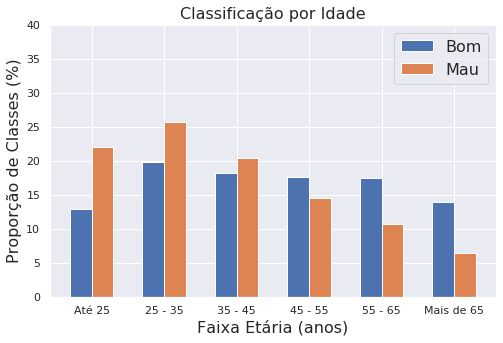

In [68]:
rcParams['figure.figsize'] = 8, 5
# set width of bar
barWidth = 0.3
x = ['Até 25', '25 - 35', '35 - 45', '45 - 55', '55 - 65', 'Mais de 65']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(good_age))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, 100*good_age/(good_age.sum()), width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, 100*bad_age/(bad_age.sum()), width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Faixa Etária (anos)', fontsize= fontsize)
pylab.ylabel('Proporção de Classes (%)', fontsize= fontsize)
pylab.ylim((0, 40))
plt.title('Classificação por Idade', fontsize= fontsize)
plt.xticks(x_pos, x)
 
# Create legend & Show graphic
plt.legend(fontsize= fontsize)
plt.savefig('./results/idade.png', bbox_inches = 'tight',
        pad_inches = 0)

## Sexo

In [14]:
print('Mulher: %f' %(tabelao.SEXO.value_counts()[0]/len(tabelao.SEXO)),
      '\nHomem: %f' %(tabelao.SEXO.value_counts()[1]/len(tabelao.SEXO)))
tabelao.SEXO.value_counts()

Mulher: 0.516203 
Homem: 0.483787


F    52869
M    49549
Name: SEXO, dtype: int64

In [15]:
c = good.groupby('SEXO').size()
d = bad.groupby('SEXO').size()

Gráficos:

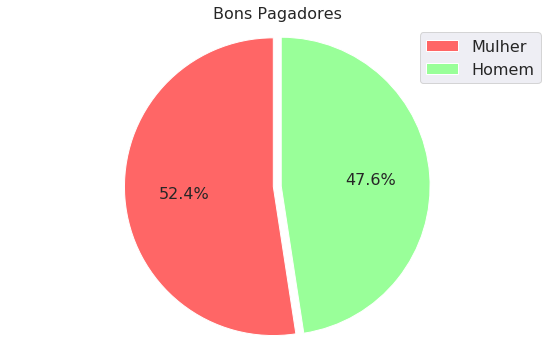

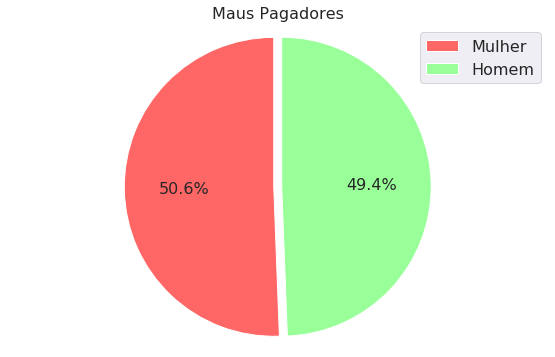

In [66]:
rcParams['figure.figsize'] = 8, 5

# Data to plot
labels = ['Mulher', 'Homem']
sizes = [c.values, d.values]
explode = (0.02,0.02)
colors = ['#ff6666', '#99ff99']

titles = ['Bons Pagadores', 'Maus Pagadores']
for i, title in enumerate(titles):
    # Plot
    plt.figure(0)
    plt.pie(sizes[i], colors=colors, radius=0.75,startangle=90,explode=explode,autopct='%1.1f%%')
    
    # Draw white circle in the middle
#     centre_circle = plt.Circle((0,0),0.40,fc='white')
#     fig = plt.gcf()
#     fig.gca().add_artist(centre_circle)
    
    # Axis
    plt.axis('equal')
    plt.tight_layout()
    pylab.title(title, fontsize= fontsize)
    plt.legend(labels=labels, fontsize= fontsize)
    plt.savefig('./results/sexo_{}.png'.format(str(i)), bbox_inches = 'tight',
        pad_inches = 0)
    plt.show()



## Renda titular

In [17]:
tabelao.RENDA_TITULAR.describe()

count    102413.000000
mean       1684.106720
std        1388.467019
min         400.000000
25%        1060.000000
50%        1400.000000
75%        1947.000000
max      180000.000000
Name: RENDA_TITULAR, dtype: float64

In [18]:
base = 990.0

In [19]:
e = good.groupby('RENDA_TITULAR').size()
f = bad.groupby('RENDA_TITULAR').size()

In [20]:
good_wage = [e[(e.index > 0) & (e.index <= base)].sum(), 
        e[(e.index > base) & (e.index <= 2*base)].sum(), 
        e[(e.index > 2*base) & (e.index <= 3*base)].sum(),
        e[(e.index > 3*base) & (e.index <= 4*base)].sum(),
        e[(e.index > 4*base)].sum()]
good_wage

[11323, 30533, 9740, 3046, 2704]

In [21]:
bad_wage = [f[(f.index > 0) & (f.index <= base)].sum(), 
        f[(f.index > base) & (f.index <= 2*base)].sum(), 
        f[(f.index > 2*base) & (f.index <= 3*base)].sum(),
        f[(f.index > 3*base) & (f.index <= 4*base)].sum(),
        f[(f.index > 4*base)].sum()]
bad_wage

[8747, 26695, 6625, 1663, 1337]

In [22]:
gw = np.array(good_wage)
bw = np.array(bad_wage)
print('good:',gw/(gw.sum()),'\nbad:',bw/(bw.sum()))

good: [0.19745056 0.53243469 0.1698462  0.05311617 0.04715237] 
bad: [0.1940888  0.59234029 0.14700335 0.03690061 0.02966694]


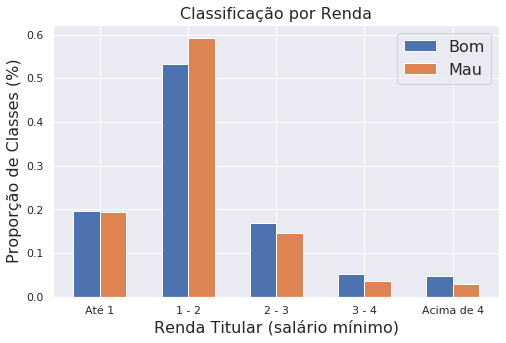

In [70]:
rcParams['figure.figsize'] = 8, 5
# set width of bar
barWidth = 0.3
x = ['Até 1', '1 - 2', '2 - 3', '3 - 4', 'Acima de 4']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(good_wage))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, gw/(gw.sum()), width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, bw/(bw.sum()), width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Renda Titular (salário mínimo)', fontsize= fontsize)
pylab.ylabel('Proporção de Classes (%)', fontsize= fontsize)
# pylab.ylim((0, 100))
plt.title('Classificação por Renda', fontsize= fontsize)
plt.xticks(x_pos, x)
 
# Create legend & Show graphic
plt.legend(fontsize= fontsize)
plt.savefig('./results/salario.png', bbox_inches = 'tight',
        pad_inches = 0)

In [24]:
print('all good:', len(good)/(len(bad)+len(good)),'\nall bad:',len(bad)/(len(bad)+len(good)))

all good: 0.5599449320926781 
all bad: 0.4400550679073219


## Estado civil

In [25]:
ec = tabelao.groupby('ESTADO_CIVIL').size()
ec

ESTADO_CIVIL
CA    27068
CO    11420
SE     5747
SO    53046
VI     5137
dtype: int64

In [26]:
print('Proporção natural da base:')
ec.values/ec.sum()

Proporção natural da base:


array([0.26428948, 0.11150384, 0.05611318, 0.5179363 , 0.0501572 ])

In [27]:
g = good.groupby('ESTADO_CIVIL').size()
h = bad.groupby('ESTADO_CIVIL').size()

In [28]:
ec_good = (g/(g.sum())).values

In [29]:
ec_bad = (h/(h.sum())).values

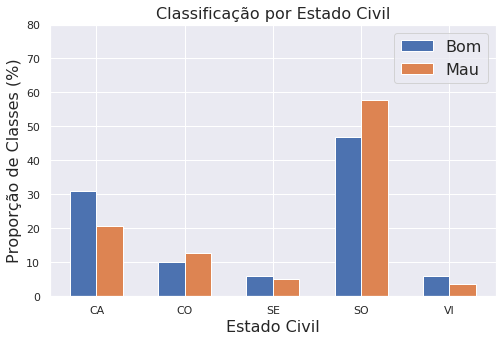

In [71]:
rcParams['figure.figsize'] = 8, 5
# set width of bar
barWidth = 0.3
x = ['CA', 'CO', 'SE', 'SO', 'VI']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(ec_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, ec_good*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, ec_bad*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Estado Civil', fontsize= fontsize)
pylab.ylabel('Proporção de Classes (%)', fontsize= fontsize)
pylab.ylim((0, 80))
plt.title('Classificação por Estado Civil', fontsize= fontsize)
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(fontsize= fontsize)
plt.savefig('./results/estado_civil.png', bbox_inches = 'tight',
        pad_inches = 0)

## Profissão

A categoria "Liberal" foi excluída da análise devido ao baixo número de instâncias.

In [32]:
cp = tabelao.groupby('CATEGORIAL_PROFISSAO').size()[:-1]
cp

CATEGORIAL_PROFISSAO
AGRICULTOR      3487
APOSENTADO     20092
ASSALARIADO    48900
AUT+NOMO       27869
dtype: int64

In [33]:
i = good.groupby('CATEGORIAL_PROFISSAO').size()[:-1]
j = bad.groupby('CATEGORIAL_PROFISSAO').size()[:-1]

In [34]:
cp_good = (i/(i.sum())).values
cp_bad = (j/(j.sum())).values

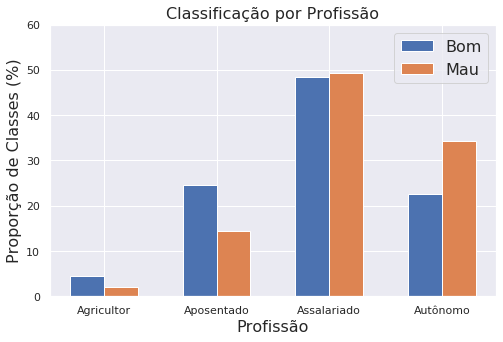

In [72]:
rcParams['figure.figsize'] = 8, 5
# set width of bar
barWidth = 0.3
x = ['Agricultor', 'Aposentado', 'Assalariado', 'Autônomo']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(cp_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, cp_good*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, cp_bad*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Profissão', fontsize= fontsize)
pylab.ylabel('Proporção de Classes (%)', fontsize= fontsize)
pylab.ylim((0, 60))
plt.title('Classificação por Profissão', fontsize= fontsize)
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(fontsize= fontsize)
plt.savefig('./results/profissao.png', bbox_inches = 'tight',
        pad_inches = 0)

## Tipo de Residência

As categorias "FA", "FI", "SM" foram excluídas da análise devido ao baixo número de instâncias.

In [37]:
tabelao.groupby('TIPO_RESIDENCIA').size()

TIPO_RESIDENCIA
AL    10131
FA     2471
FI     2076
OU    24766
PR    61809
SM      163
dtype: int64

In [38]:
k = good.groupby('TIPO_RESIDENCIA').size()[['AL','OU', 'PR']]
l = bad.groupby('TIPO_RESIDENCIA').size()[['AL','OU', 'PR']]

In [39]:
tr_good = (k/k.sum()).values
tr_bad = (l/l.sum()).values

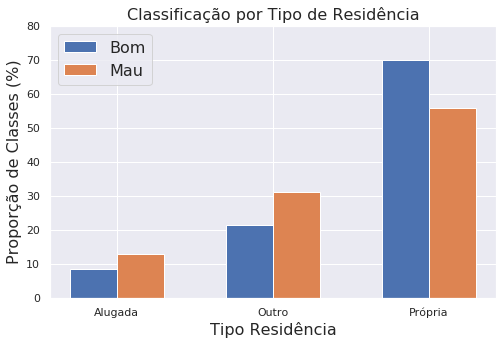

In [75]:
rcParams['figure.figsize'] = 8, 5
# set width of bar
barWidth = 0.3
x = ['AL', 'OU', 'PR']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(tr_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, tr_good*100, width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, tr_bad*100, width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Tipo Residência', fontsize= fontsize)
pylab.ylabel('Proporção de Classes (%)', fontsize= fontsize)
pylab.ylim((0, 80))

plt.title('Classificação por Tipo de Residência', fontsize= fontsize)
plt.xticks(x_pos, ['Alugada', 'Outro', 'Própria'])

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(fontsize= fontsize)
plt.savefig('./results/residencia.png', bbox_inches = 'tight',
        pad_inches = 0)

## Quantidade de dependentes

In [41]:
tabelao.groupby('QTD_DEPENDENTES').size()

QTD_DEPENDENTES
0.0     78312
1.0     15345
2.0      6350
3.0      1752
4.0       444
5.0       124
6.0        41
7.0        14
8.0        20
9.0         4
10.0       11
dtype: int64

In [42]:
m = good.groupby('QTD_DEPENDENTES').size()
n = bad.groupby('QTD_DEPENDENTES').size()

In [43]:
qtd_good = np.array([m[m.index == 0].sum(), 
        m[m.index == 1].sum(), 
        m[m.index >= 2].sum()])
qtd_good

array([45190,  8057,  4100])

In [44]:
qtd_bad = np.array([n[n.index == 0].sum(), 
        n[n.index == 1].sum(), 
        n[n.index >= 2].sum()])
qtd_bad

array([33122,  7288,  4660])

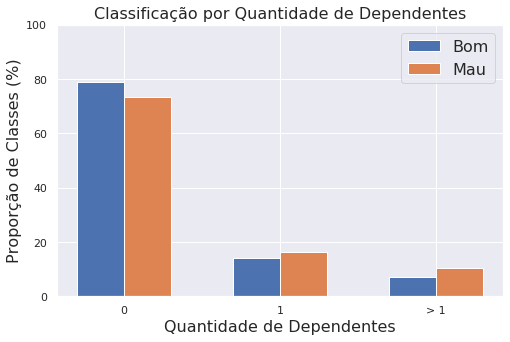

In [78]:
rcParams['figure.figsize'] = 8,5
# set width of bar
barWidth = 0.3
x = ['0', '1', '> 1']
x_pos = [i + 0.5*barWidth for i, _ in enumerate(x)]

# Set position of bar on X axis
r1 = np.arange(len(qtd_good))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, 100*qtd_good/qtd_good.sum(), width=barWidth, edgecolor='white', label='Bom')
plt.bar(r2, 100*qtd_bad/qtd_bad.sum(), width=barWidth, edgecolor='white', label='Mau')
 
# Add xticks on the middle of the group bars
pylab.xlabel('Quantidade de Dependentes', fontsize= fontsize)
pylab.ylabel('Proporção de Classes (%)', fontsize= fontsize)
pylab.ylim((0, 100))

plt.title('Classificação por Quantidade de Dependentes', fontsize= fontsize)
plt.xticks(x_pos, x)

#Lines
# pylab.axhline(0.2518*100, color='black', linestyle='--', linewidth = 1)
# pylab.axhline(0.7481*100, color='black', linestyle='--', linewidth = 1)
 
# Create legend & Show graphic
plt.legend(fontsize= fontsize)
plt.savefig('./results/dependentes.png', bbox_inches = 'tight',
        pad_inches = 0)

## Correlação das Variáveis

In [ ]:
# Compute the correlation matrix
corr = tabelao.iloc[:,1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})